In [1]:
import os
os.chdir('/root/autodl-tmp/FLIR_ADAS_v2')
! tree -L 2
! cd images_rgb_train/data;ls|head -n 3
! cd images_thermal_train/data;ls|head -n 3

.
├── images_rgb_train
│   ├── coco.json
│   ├── coco_annotation_counts.tsv
│   ├── coco_annotation_counts.txt
│   ├── data
│   └── index.json
├── images_rgb_val
│   ├── coco.json
│   ├── coco_annotation_counts.tsv
│   ├── coco_annotation_counts.txt
│   ├── data
│   └── index.json
├── images_thermal_train
│   ├── analyticsData
│   ├── coco.json
│   ├── coco_annotation_counts.tsv
│   ├── coco_annotation_counts.txt
│   ├── data
│   └── index.json
├── images_thermal_val
│   ├── analyticsData
│   ├── coco.json
│   ├── coco_annotation_counts.tsv
│   ├── coco_annotation_counts.txt
│   ├── data
│   └── index.json
├── rgb_to_thermal_vid_map.json
├── video_rgb_test
│   ├── annotation_counts.tsv
│   ├── annotation_counts.txt
│   ├── coco.json
│   ├── data
│   └── index.json
└── video_thermal_test
    ├── analyticsData
    ├── annotation_counts.tsv
    ├── annotation_counts.txt
    ├── coco.json
    ├── data
    └── index.json

15 directories, 25 files
video-23bsd9bsr962GdFBZ-frame-000221-arDqqfM

coco.json, coco_annotation_counts,index.json为图像目标检测时使用的相关信息

data文件夹里的是rgb图（如果是红外的文件夹里就是经过后处理过的256级灰度图）

红外文件夹里的analyticsData文件夹里的是16bits的原始红外图

train和val数据集不是成对的，test数据集是成对的，对应标号见rgb2thermal.txt

每个图像都是从视频中提取出来的，都是jpg格式图片

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img),cmap='gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
import glob

rgb_train_files = sorted(glob.glob('images_rgb_train/data/' + "/*.*")) # 读取文件数据
thermal_train_files = sorted(glob.glob('images_thermal_train/data'+"/*.*"))
rgb_val_files = sorted(glob.glob('images_rgb_val/data/' + "/*.*"))
thermal_val_files = sorted(glob.glob('images_thermal_val/data'+"/*.*"))
rgb_test_files = sorted(glob.glob('video_rgb_test/data/' + "/*.*"))
thermal_test_files = sorted(glob.glob('video_thermal_test/data'+"/*.*"))

In [4]:
from PIL import Image
fig1=Image.open(rgb_train_files[0])
fig2=Image.open(thermal_train_files[0])
print(fig1.size)
print(fig1.mode)
print(fig2.size)
print(fig2.mode)#L代表256级灰度图

fig1=Image.open(rgb_val_files[0])
fig2=Image.open(thermal_val_files[0])
print(fig1.size)
print(fig1.mode)
print(fig2.size)
print(fig2.mode)

fig1=Image.open(rgb_test_files[0])
fig2=Image.open(thermal_test_files[0])
print(fig1.size)
print(fig1.mode)
print(fig2.size)
print(fig2.mode)

(1800, 1600)
RGB
(640, 512)
L
(1224, 1024)
RGB
(640, 512)
L
(1224, 1024)
RGB
(640, 512)
L


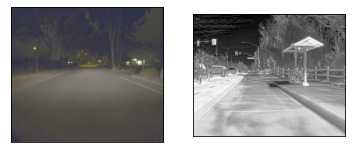

In [5]:
from torchvision.io import read_image
fig_1 = read_image(rgb_train_files[0])
fig_2 = read_image(thermal_train_files[0])

show([fig_1,fig_2])

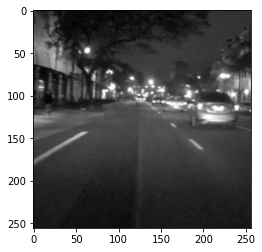

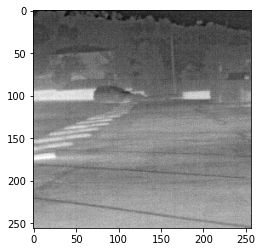

In [36]:
from torchvision.transforms import transforms
A_transforms = transforms.Compose([
    transforms.Grayscale(),    
    transforms.CenterCrop(size=1024),
    transforms.Resize(size=256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
B_transforms = transforms.Compose([
    # transforms.Grayscale(num_output_channels=3),
    transforms.CenterCrop(size=256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
fig1=Image.open(rgb_train_files[30])
new_fig1 = A_transforms(fig1)#image read from Image.open
new_fig2 = B_transforms(fig2)
# show([new_fig1,new_fig2])
plt.imshow(new_fig1.squeeze(),cmap = 'gray')
plt.figure()
plt.imshow(new_fig2.squeeze(),cmap = 'gray')

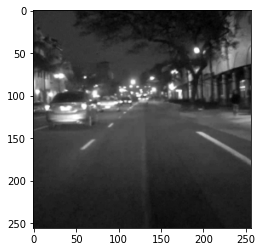

In [30]:
plt.imshow(new_fig1.squeeze(),cmap='gray')